<a href="https://colab.research.google.com/github/pgssanjana/micro_projects/blob/main/Combined_Tb_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle datasets list

Saving kaggle.json to kaggle.json


In [2]:
!kaggle datasets download -d tawsifurrahman/tuberculosis-tb-chest-xray-dataset

 98% 650M/663M [00:13<00:00, 121MB/s]
100% 663M/663M [00:13<00:00, 51.5MB/s]


In [3]:
!kaggle datasets download -d raddar/tuberculosis-chest-xrays-shenzhen

 99% 3.49G/3.51G [00:22<00:00, 247MB/s]
100% 3.51G/3.51G [00:22<00:00, 167MB/s]


In [4]:
!kaggle datasets download -d raddar/tuberculosis-chest-xrays-montgomery

 99% 579M/585M [00:02<00:00, 245MB/s]
100% 585M/585M [00:02<00:00, 224MB/s]


In [5]:
!kaggle datasets download -d raddar/chest-xrays-tuberculosis-from-india

 80% 27.0M/33.7M [00:00<00:00, 142MB/s]
100% 33.7M/33.7M [00:00<00:00, 151MB/s]


In [6]:
import zipfile
zf = "/content/tuberculosis-tb-chest-xray-dataset.zip"
target_dir = "/content/dataset/chest-xray"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [7]:
import zipfile
zf = "/content/tuberculosis-chest-xrays-shenzhen.zip"
target_dir = "/content/dataset/china"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [8]:
import zipfile
zf = "/content/tuberculosis-chest-xrays-montgomery.zip"
target_dir = "/content/dataset/US"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [9]:
import zipfile
zf = "/content/chest-xrays-tuberculosis-from-india.zip"
target_dir = "/content/dataset/India"
zfile = zipfile.ZipFile(zf)
zfile.extractall(target_dir)

In [10]:
import os
import shutil
import numpy as np
def make_dirs_for_data():
  par_dir="/content/dataset"
  path = par_dir+'/evaluate'
  os.mkdir(path)

  par_dir="/content/dataset/evaluate"
  path = par_dir+'/train'
  os.mkdir(path)

  par_dir="/content/dataset/evaluate"
  path = par_dir+'/test'
  os.mkdir(path)

  par_dir="/content/dataset/evaluate"
  path = par_dir+'/val'
  os.mkdir(path)

  path_of_test = "/content/dataset/evaluate/train" 
  path_of_test_normal = path_of_test+'/Normal'
  path_of_test_Tb = path_of_test+'/Tb'
  os.mkdir(path_of_test_normal)
  os.mkdir(path_of_test_Tb)

  path_of_test = "/content/dataset/evaluate/test" 
  path_of_test_normal = path_of_test+'/Normal'
  path_of_test_Tb = path_of_test+'/Tb'
  os.mkdir(path_of_test_normal)
  os.mkdir(path_of_test_Tb)

  path_of_test = "/content/dataset/evaluate/val" 
  path_of_test_normal = path_of_test+'/Normal'
  path_of_test_Tb = path_of_test+'/Tb'
  os.mkdir(path_of_test_normal)
  os.mkdir(path_of_test_Tb)

  # NORMAL
  source = '/content/dataset/chest-xray/TB_Chest_Radiography_Database/Normal/'
  destination = '/content/dataset/evaluate/train/Normal/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:1555]
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/evaluate/train/Normal/'
  destination = '/content/dataset/evaluate/val/Normal/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:311]
  for f in allfiles:
    shutil.move(source + f, destination + f)
  
  source = '/content/dataset/chest-xray/TB_Chest_Radiography_Database/Normal/'
  destination = '/content/dataset/evaluate/test/Normal/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:100]
  for f in allfiles:
    shutil.move(source + f, destination + f)

  # #TB
  source = '/content/dataset/chest-xray/TB_Chest_Radiography_Database/Tuberculosis/'
  destination = '/content/dataset/evaluate/train/Tb/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/India/images/images/'
  destination = '/content/dataset/evaluate/train/Tb/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/US/images/images/'
  destination = '/content/dataset/evaluate/train/Tb/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/china/images/images/'
  destination = '/content/dataset/evaluate/train/Tb/'
  allfiles = os.listdir(source)
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source ='/content/dataset/evaluate/train/Tb/'
  destination = '/content/dataset/evaluate/test/Tb/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:100]
  for f in allfiles:
    shutil.move(source + f, destination + f)

  source = '/content/dataset/evaluate/train/Tb/'
  destination = '/content/dataset/evaluate/val/Tb/'
  allfiles = os.listdir(source)
  np.random.shuffle(allfiles)
  allfiles = allfiles[:311]
  for f in allfiles:
    shutil.move(source + f, destination + f)


  print("train-normal",len(os.listdir('/content/dataset/evaluate/train/Normal')))
  print("train-Tb",len(os.listdir('/content/dataset/evaluate/train/Tb')))
  print("test-normal",len(os.listdir('/content/dataset/evaluate/test/Normal')))
  print("test-Tb",len(os.listdir('/content/dataset/evaluate/test/Tb')))
  print("val-normal",len(os.listdir('/content/dataset/evaluate/val/Normal')))
  print("val-Tb",len(os.listdir('/content/dataset/evaluate/val/Tb')))


In [11]:
make_dirs_for_data()

train-normal 1244
train-Tb 1244
test-normal 100
test-Tb 100
val-normal 311
val-Tb 311


In [12]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [13]:
img_height,img_width = (224,224)
batch_size=32

train_data='/content/dataset/evaluate/train'
val_data='/content/dataset/evaluate/val'
test_data='/content/dataset/evaluate/test'

In [14]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator =train_datagen.flow_from_directory(
    train_data,
    target_size=(img_height, img_width),
    batch_size=batch_size, 
    class_mode='binary'
    # subset='training'
)
val_generator = train_datagen.flow_from_directory(
    val_data,
    target_size=(img_height,img_width),
     batch_size=batch_size,
    class_mode='binary'
    # subset='validation'
    )


Found 2488 images belonging to 2 classes.
Found 622 images belonging to 2 classes.


In [15]:
test_generator =train_datagen.flow_from_directory( test_data, # same directory as training data
                                                 target_size=(img_height, img_width),
                                                 batch_size=1, 
                                                  class_mode='binary' 
                                                  # subset='validation'
                                                  ) 

Found 200 images belonging to 2 classes.


In [16]:
x,y=test_generator.next()
x.shape

(1, 224, 224, 3)

In [17]:
import tensorflow as tf
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5',
                              monitor='val_loss',
                             verbose=1, 
                             save_best_only=True),
    tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]


In [18]:
from tensorflow.keras.applications.resnet50 import ResNet50
base_model=ResNet50(include_top=False, weights='imagenet')
x=base_model.output
x = GlobalAveragePooling2D() (x)
x=Dense(1024, activation='relu')(x)
# x=Flatten()(x)
predictions=Dense(1, activation='sigmoid')(x) #train_generator.num_classes
model=Model(inputs=base_model.input,outputs=predictions)

for layer in base_model.layers: 
  layer.trainable=False

from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.003), loss="binary_crossentropy", metrics = ['accuracy'])

# history = base_model.fit(train_generator,
#                                   validation_data=val_generator,
#                                   steps_per_epoch=32,  #int(2488/batch_size),
#                                   epochs=15,
#                                   verbose=1,
# )                      
History = model.fit(train_generator,validation_data=val_generator,epochs = 10,verbose=1,callbacks=my_callbacks,steps_per_epoch=32)

94781440/94765736 [==============================] - 1s 0us/step


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
32/32 [==============================] - ETA: 0s - loss: 2.1888 - accuracy: 0.7080
Epoch 1: val_loss improved from inf to 0.64053, saving model to model.01-0.64.h5
32/32 [==============================] - 115s 3s/step - loss: 2.1888 - accuracy: 0.7080 - val_loss: 0.6405 - val_accuracy: 0.7588
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.3091 - accuracy: 0.8662
Epoch 2: val_loss improved from 0.64053 to 0.25580, saving model to model.02-0.26.h5
32/32 [==============================] - 83s 3s/step - loss: 0.3091 - accuracy: 0.8662 - val_loss: 0.2558 - val_accuracy: 0.8971
Epoch 3/10
32/32 [==============================] - ETA: 0s - loss: 0.2272 - accuracy: 0.9094
Epoch 3: val_loss improved from 0.25580 to 0.15467, saving model to model.03-0.15.h5
32/32 [==============================] - 82s 3s/step - loss: 0.2272 - accuracy: 0.9094 - val_loss: 0.1547 - val_accuracy: 0.9357
Epoch 4/10
32/32 [==============================] - ETA: 0s - loss: 0.1571 - ac

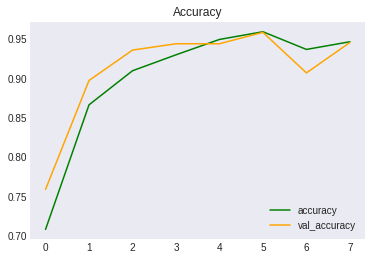

In [21]:
import ctypes
# ctypes.cast(0x7ffa1bb2e650,ctypes.py_object).value
# history = ctypes.cast(0x7ffa1bb2e650,ctypes.py_object).value
plt.style.use("seaborn-dark")
plt.title("Accuracy")
plt.plot(History.history['accuracy'],label="accuracy",c='green')
plt.plot(History.history['val_accuracy'],label="val_accuracy",c='orange')
plt.legend()
plt.show()
# history

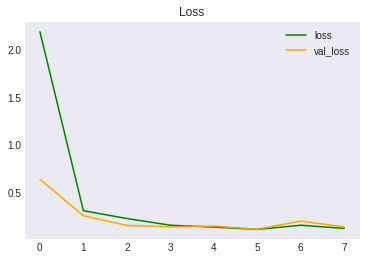

In [22]:
plt.style.use("seaborn-dark")
plt.title("Loss")
plt.plot(History.history['loss'],label="loss",c='green')
plt.plot(History.history['val_loss'],label="val_loss",c='orange')
plt.legend()
plt.show()

In [23]:
test_loss,test_accuracy= model.evaluate(test_generator,verbose=2)

200/200 - 15s - loss: 0.1563 - accuracy: 0.9450 - 15s/epoch - 76ms/step


In [26]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                           

In [32]:
import numpy as np
import h5py

f = h5py.File('/content/model.10-0.07.hdf5','w')
group = f.create_group('a_group')
group.create_dataset(name='matrix', data=np.zeros((10, 10)), chunks=True, compression='gzip')
f.close()

In [35]:
model.load_weights('model.06-0.12.h5')

In [38]:
from cv2 import imread,resize 


In [144]:
img = imread('/content/Normal-1028.jpg')[:,:,:3]  
img = resize(img, (224, 224))

In [111]:
img.shape

(224, 224, 3)

In [145]:
arr = np.zeros((1, 224, 224, 3), dtype=np.uint8)

In [146]:
arr[0]=img

In [147]:
pred=model.predict(arr)

print(pred)

# pred = np.argmax(pred)

if pred[0]<0.5:
  print("Normal")
else:
  print("Tuberculosis")

[[0.1693037]]
Normal


In [97]:
test_generator.reset()

validation_predictions = model.predict_generator(test_generator,
                                                   
                                                    workers=1, 
                                                    use_multiprocessing=False,
                                                    verbose=1)

index_array_of_images = test_generator.index_array[:validation_predictions.shape[0]]

actual_labels = np.array(test_generator.classes)[index_array_of_images]
predicted_labels = np.argmax(validation_predictions[index_array_of_images], axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  import sys


200/200 [==============================] - 13s 62ms/step


In [115]:
actual_labels[:10]



array([1, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int32)

In [116]:
predicted_labels[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [117]:
print(predicted_labels.shape)
print(np.array(actual_labels).shape)

print("Total number of images classified correctly = ",np.sum(actual_labels == predicted_labels))
print("hence accuracy = ", np.sum(actual_labels == predicted_labels) / predicted_labels.shape )

(200,)
(200,)
Total number of images classified correctly =  100
hence accuracy =  [0.5]


In [118]:
from sklearn.metrics import classification_report, confusion_matrix

Confusn_matrix_validation_set = confusion_matrix(actual_labels, predicted_labels)

print("prediction is done on ",np.sum(Confusn_matrix_validation_set)," number of examples\n")
print('Confusion Matrix')
print(Confusn_matrix_validation_set)


prediction is done on  200  number of examples

Confusion Matrix
[[100   0]
 [100   0]]


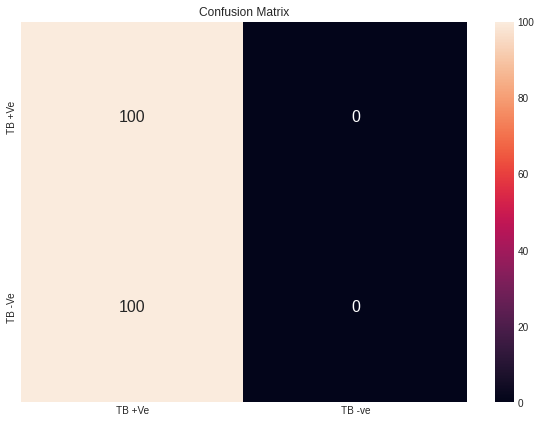

In [119]:
import seaborn as sn
plt.figure(figsize = (10,7))
plt.title("Confusion Matrix")
sn.heatmap(Confusn_matrix_validation_set, annot=True,fmt='g',annot_kws={"size": 16}, xticklabels = ['TB +Ve', 'TB -ve'], yticklabels = ['TB +Ve', 'TB -Ve'])